<html>
  <h1  align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Aprendizaje Supervisado
  </h1>
  <h2 align="center";>
Spaceship Titanic 🚀
  </h2>
<hr>
<div align="center">
    <img src='https://pic2.zhimg.com/v2-768b110090ef51c582c2f846adcb689a_r.jpg?source=172ae18b' style='height:100px;'>
</div>
</html>


## Profesora del Práctico:
- Fonseca, Rocio

## Integrantes [ Grupo 5 ]:
- Argüello, Leandro Ismael
- Corral, Diego
- Racciatti. Florencia 
- Rinaudo, Eleana
- Romero, Ernest

<html>
<hr>
  <h1  align="center";>
    Aprendizaje Supervisado
  </h1>
</html>

Se busca realizar la prediccion de cuantos pasajeros fueron transportados a otra dimension cuando la nave accidentalmente ingreso a la anomalia espacio-temporal.

## Importación de librerías

Importamos la librerías que vamos a utilizar en el práctico.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
)
from sklearn.model_selection import (
    train_test_split,
    ParameterSampler,
    RandomizedSearchCV,
    ParameterGrid,
    GridSearchCV,
)


## Conjuntos de datos

Comenzamos adquiriendo los conjuntos de datos de entrenamiento y prueba del repositorio de GitHub del práctico.

In [ ]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
subm = pd.read_csv("data/submission.csv")

## Exploración de los datos

Realizamos un vistazo de los primeros datos del `train`:




In [ ]:
print(train.shape)
train.head()


(7823, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


Realizamos un vistazo de los primeros datos del `test`:


In [ ]:
print(test.shape)
test.head()


(870, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive


Realizamos un vistazo de los primeros datos del `subm`:


In [ ]:
print(subm.shape)
subm.head()

(870, 2)


,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,0


## Verificamos si existen columnas nulas

In [ ]:
print("TRAIN")
train.info()
print("_" * 40)
print("TEST")
test.info()


TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB
________________________________________
TEST
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (tot

In [ ]:
subm.Transported.value_counts()

0    460
1    410
Name: Transported, dtype: int64

In [ ]:
subm.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

>**Observación:**
>
>El `subm` esta balanceado y no presenta valores nulos.

------

## Análisis de correlación de las variables de `train`.

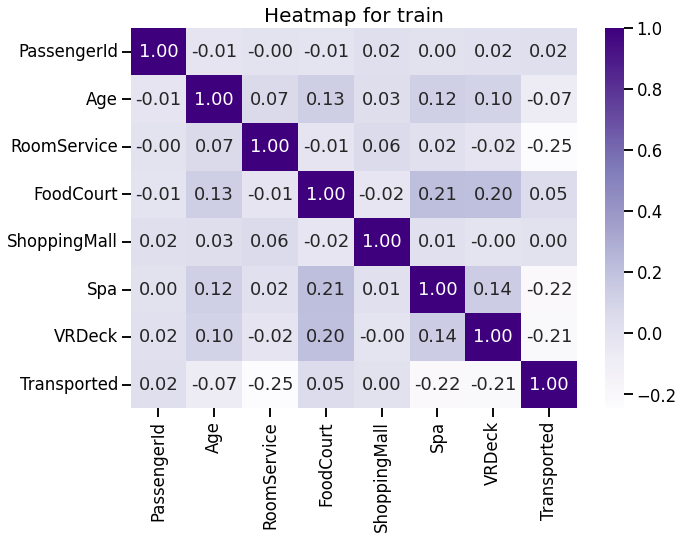

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="Purples")
plt.title("Heatmap for train", fontsize=20)
plt.show()


>**Observación:**
>
>Se observan ciertas correlaciones aunque nada demasiado significativo, un máximo de -0.25.

### Observamos nulos y su porcentaje dentro de cada columna asi como en el total.

In [ ]:
missing_values = train.isna().sum()
missing_values


PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (
    (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
) * 100
missing_data = pd.concat(
    [total, round(percent, 3)], axis=1, keys=["Total_nuls_train", "Percent"]
)
missing_data.style.background_gradient(subset=["Percent"])


,Total_nuls_train,Percent
CryoSleep,196,2.505000
ShoppingMall,188,2.403000
Cabin,184,2.352000
VIP,184,2.352000
Name,184,2.352000
HomePlanet,179,2.288000
VRDeck,169,2.160000
Age,162,2.071000
Destination,160,2.045000
Spa,158,2.020000


In [ ]:
total_nuls = missing_data.Total_nuls_train.sum()
perc_nuls = (total_nuls * 100) / len(train)
print(
    " Total de nulos en train: ",
    total_nuls,
    "\n Porcentaje de nulos en train: ",
    round(perc_nuls, 2),
)


 Total de nulos en train:  2073 
 Porcentaje de nulos en train:  26.5


>**Observación:**
>
>Basandonos en que el numero de datos nulos total representa un 26.5% del total d datos de `train`, es posible que tengamos que imputar datos. 

In [ ]:
train.dtypes


PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [ ]:
plt.rcParams["figure.figsize"] = (7, 5)


<html>
  <h2  align="center";>
    HomePlanet
  </h2>
</html>

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

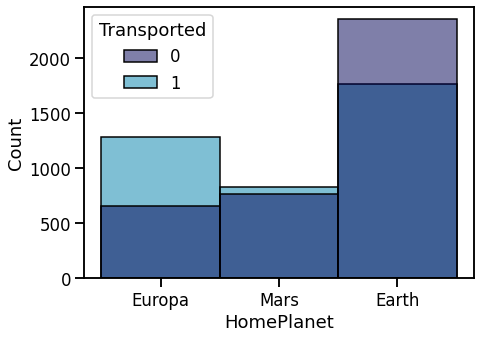

In [ ]:
sns.histplot(data=train, x="HomePlanet", hue="Transported", palette="ocean")


<html>
  <h2  align="center";>
    Destination
  </h2>
</html>

<AxesSubplot:xlabel='Destination', ylabel='Count'>

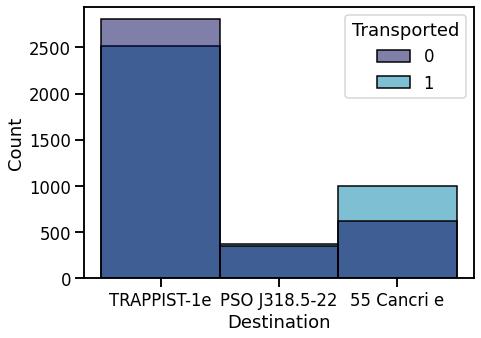

In [ ]:
sns.histplot(data=train, x="Destination", hue="Transported", palette="ocean")


<html>
  <h2  align="center";>
    Age
  </h2>
</html>

<AxesSubplot:xlabel='Age', ylabel='Count'>

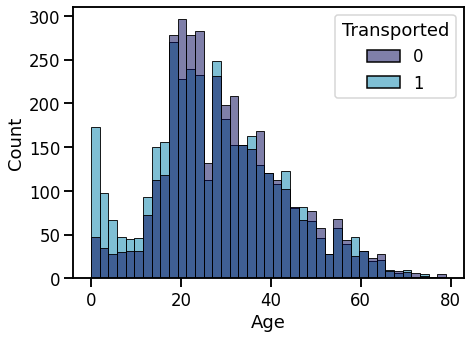

In [ ]:
# Age
sns.histplot(data=train, x="Age", hue="Transported", palette="ocean")


<html>
  <h2  align="center";>
    Cabin
  </h2>
</html>

In [ ]:
train.Cabin.value_counts()


G/734/S     8
B/201/P     7
F/1194/P    7
E/13/S      7
G/117/S     6
           ..
B/120/P     1
G/6/S       1
G/80/S      1
G/631/S     1
E/253/P     1
Name: Cabin, Length: 6009, dtype: int64

### Analisis descriptivo de variables que no seran graficadas.  
- Las variables `CryoSleep` y `VIP` son de tipo booleano.  
- La variable `Cabin` representa el numero de cabina con el detalle de si es en babor(P) o estribor(S).  
- La variable `Name` representa el nombre completo del pasajero.  
- La variable `PassengerId` representa el id del pasajero.  

#### Análisis de variables referidas al monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.

<html>
  <h2  align="center";>
    RoomService
  </h2>
</html>

<AxesSubplot:xlabel='RoomService'>

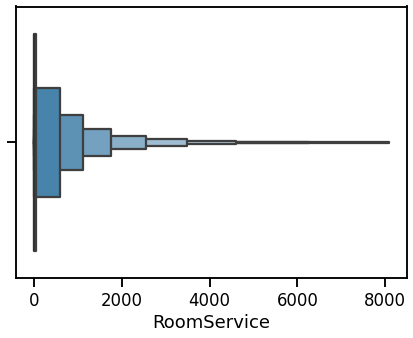

In [ ]:
sns.boxenplot(train.RoomService, showfliers=False);


<html>
  <h2  align="center";>
    FoodCourt
  </h2>
</html>

<AxesSubplot:xlabel='FoodCourt'>

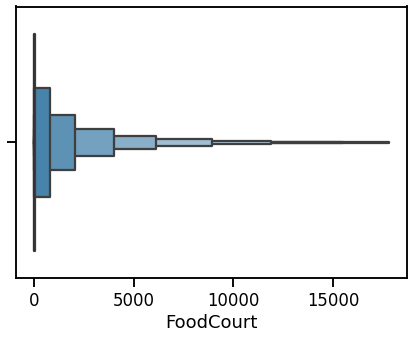

In [ ]:
sns.boxenplot(train.FoodCourt, showfliers=False);


<html>
  <h2  align="center";>
    ShoppingMall
  </h2>
</html>

<AxesSubplot:xlabel='ShoppingMall'>

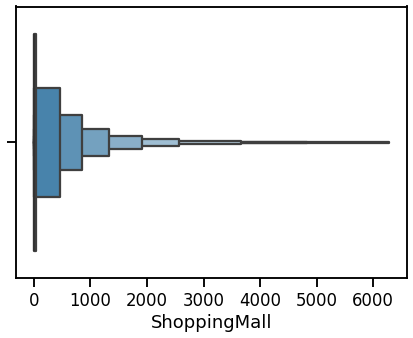

In [ ]:
sns.boxenplot(train.ShoppingMall, showfliers=False);


<html>
  <h2  align="center";>
    Spa
  </h2>
</html>

In [ ]:
sns.boxenplot(train.Spa, showfliers=False);

<html>
  <h2  align="center";>
    VRDeck
  </h2>
</html>

<AxesSubplot:xlabel='VRDeck'>

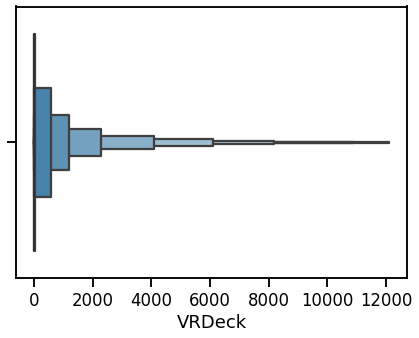

In [ ]:
sns.boxenplot(train.VRDeck, showfliers=False)


>**Observaciones:**
>
>- A partir de las observaciones realizadas sobre los datos, podemos decir que las variables correspondientes al grupo de Servicios de lujo del Spaceship Titanic, contiene datos un poco desbalanceados con Outliers.  
>- A demas las variables `CryoSleep` y `VIP` son del tipo booleano, por lo cual probablemente deban descartarse o ser reemplazadas por valores numericos como 0 y 1.  
>- Las columnas categoricas `Homeplanet` y `Destination` aportan una posible clasificación del `target`.  
>- La columna `Cabin` puede ser usada para generar nuevas features.


#### Posibles acciones

- Usar metodo de imputacion de valores faltantes a los nulos de cada variable.  
- Probar una limpieza de outliers de las columnas de montos en lujos.  
- Codificar las variables categoricas.  
- Con respecto a las dos variables tipo boolean, ver si combiene codificarlas o transformarlas en 0 y 1.  
- Elegir columnas a excluir como por Name y PassengerId.

__________

### Columnas elegidas para el análisis en `train`.

Creemos que las siguientes columnas aportan informacion útil para la clasificación y caracterización de los pasajeros en el analisis del problema.  
**Columnas elegidas:**
    

In [ ]:
colums = [
    "HomePlanet",
    "CryoSleep",
    "Destination",
    "Age",
    "VIP",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
    "Cabin",
]

colums

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin']

Eliminamos las columnas `Name` y `PassengerId` debido a que contienen datos que son únicos o keys.

In [ ]:
train = train.drop(columns=["Name", "PassengerId"])


In [ ]:
train.shape


(7823, 12)

### Tratamiento de la variable `Cabin` y generación de nuevas features en `train`.

In [ ]:
train["Cabin"]


0        C/123/P
1        F/126/S
2        B/343/S
3       F/1420/P
4          G/9/P
          ...   
7818    F/1319/S
7819     G/459/S
7820    F/1772/P
7821     E/253/P
7822     B/270/P
Name: Cabin, Length: 7823, dtype: object

In [ ]:
new_features = train["Cabin"].str.split(pat="/", expand=True)


In [ ]:
new_features = new_features.rename(
    columns={0: "Deck_of_spaceship", 1: "Number_of_cabin", 2: "Port_or_Starboard"}
)
new_features.head()


,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,C,123,P
1,F,126,S
2,B,343,S
3,F,1420,P
4,G,9,P


Eliminamos la columna `Cabin` ya que las nuevas features aportan información con mas peso.


In [ ]:
train = train.drop(columns="Cabin")


In [ ]:
train = train.join(new_features, lsuffix="_caller", rsuffix="_other")
train.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P
1,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S
2,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S
3,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P
4,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P


**Nuevas features Agregadas:**  
- `Deck_of_spaceship`: Cubierta  
- `Number_of_cabin`: Número de Cabina  
- `Port_or_Starboard`:  S = Babor ó P = Estribor  


__________________________________

## Imputación de variables categoricas.

Las siguientes variables categóricas las imputamos por el dato de la **moda**.

<html>
  <h2  align="center";>
    HomePlanet
  </h2>
</html>

In [ ]:
train.HomePlanet.value_counts()


Earth     4114
Europa    1935
Mars      1595
Name: HomePlanet, dtype: int64

In [ ]:
train.HomePlanet.isnull().sum()


179

In [ ]:
train.shape


(7823, 14)

In [ ]:
train["HomePlanet"] = train["HomePlanet"].replace(np.nan, "Earth")


<html>
  <h2  align="center";>
    CryoSleep
  </h2>
</html>

In [ ]:
train.CryoSleep.value_counts()


False    4871
True     2756
Name: CryoSleep, dtype: int64

In [ ]:
train.CryoSleep.isnull().sum()


196

In [ ]:
train["CryoSleep"] = train["CryoSleep"].replace(np.nan, "False")


In [ ]:
train["CryoSleep"] = train.CryoSleep.astype(str)


In [ ]:
train["CryoSleep"] = train.CryoSleep.replace("False", "False")


<html>
  <h2  align="center";>
    Destination
  </h2>
</html>

In [ ]:
train.Destination.value_counts()


TRAPPIST-1e      5316
55 Cancri e      1625
PSO J318.5-22     722
Name: Destination, dtype: int64

In [ ]:
train.Destination.isnull().sum()


160

In [ ]:
train["Destination"] = train["Destination"].replace(np.nan, "TRAPPIST-1e")


<html>
  <h2  align="center";>
    VIP
  </h2>
</html>

In [ ]:
train.VIP.value_counts()


False    7456
True      183
Name: VIP, dtype: int64

In [ ]:
train.VIP.isnull().sum()


184

In [ ]:
train["VIP"] = train["VIP"].replace(np.nan, "False")


In [ ]:
train["VIP"] = train.VIP.astype(str)


In [ ]:
train["VIP"] = train.CryoSleep.replace("False", "False")


<html>
  <h2  align="center";>
    Deck_of_spaceship
  </h2>
</html>

In [ ]:
train.Deck_of_spaceship.value_counts()


F    2499
G    2294
E     792
B     698
C     680
D     435
A     237
T       4
Name: Deck_of_spaceship, dtype: int64

In [ ]:
train.Deck_of_spaceship.isnull().sum()


184

In [ ]:
train["Deck_of_spaceship"] = train["Deck_of_spaceship"].replace(np.nan, "F")


<html>
  <h2  align="center";>
    Port_or_Starboard
  </h2>
</html>

In [ ]:
train.Port_or_Starboard.value_counts()


S    3839
P    3800
Name: Port_or_Starboard, dtype: int64

In [ ]:
train.Port_or_Starboard.isnull().sum()


184

In [ ]:
train["Port_or_Starboard"] = train["Port_or_Starboard"].replace(np.nan, "S")


_________

## Imputación de valores nulos en `train` para las columnas numéricas.

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat(
    [total, round(percent, 3)], axis=1, keys=["Total_nulls_test", "Percent"]
)
missing_data.style.bar(subset=["Percent"], color="lightblue", vmin=0)


,Total_nulls_test,Percent
ShoppingMall,188,0.024000
Number_of_cabin,184,0.024000
VRDeck,169,0.022000
Age,162,0.021000
Spa,158,0.020000
FoodCourt,155,0.020000
RoomService,154,0.020000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000


In [ ]:
missing_data.dtypes


Total_nulls_test      int64
Percent             float64
dtype: object

In [ ]:
cat_cols = [
    "HomePlanet",
    "CryoSleep",
    "Destination",
    "VIP",
    "Deck_of_spaceship",
    "Port_or_Starboard",
]
num_cols = [
    "Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
    "Number_of_cabin",
]


### Utilizando `IterativeImputer`, imputamos valores faltantes de las columnas numéricas de `train`.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

train["Age"] = StandardScaler().fit_transform(train[["Age"]])
train["FoodCourt"] = StandardScaler().fit_transform(train[["FoodCourt"]])
train["RoomService"] = StandardScaler().fit_transform(train[["RoomService"]])
train["ShoppingMall"] = StandardScaler().fit_transform(train[["ShoppingMall"]])
train["Spa"] = StandardScaler().fit_transform(train[["Spa"]])
train["VRDeck"] = StandardScaler().fit_transform(train[["VRDeck"]])
train["Number_of_cabin"] = StandardScaler().fit_transform(train[["Number_of_cabin"]])

train[
    [
        "Age",
        "FoodCourt",
        "RoomService",
        "ShoppingMall",
        "Spa",
        "VRDeck",
        "Number_of_cabin",
    ]
] = mice_imputer.fit_transform(
    train[
        [
            "Age",
            "FoodCourt",
            "RoomService",
            "ShoppingMall",
            "Spa",
            "VRDeck",
            "Number_of_cabin",
        ]
    ]
)


In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat(
    [total, round(percent, 3)], axis=1, keys=["Total_nulls_train", "Percent"]
)
missing_data.style.bar(subset=["Percent"], color="lightgreen", vmin=0)


,Total_nulls_train,Percent
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000
Age,0,0.000000
VIP,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000
Spa,0,0.000000
VRDeck,0,0.000000


>**Observación:**
>
>`train` quedo sin valores nulos.

In [ ]:
train.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,False,TRAPPIST-1e,1.944636,False,-0.332891,2.099303,-0.266942,-0.097078,3.272797,0,C,-0.929337,P
1,Mars,True,TRAPPIST-1e,-0.752347,True,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,1,F,-0.923471,S
2,Europa,True,TRAPPIST-1e,0.284954,True,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,1,B,-0.499119,S
3,Earth,False,TRAPPIST-1e,0.976488,False,-0.123802,0.464079,-0.288685,-0.269134,-0.083662,0,F,1.606993,P
4,Earth,False,TRAPPIST-1e,-0.683193,False,-0.332891,-0.281056,0.831932,-0.268252,-0.239138,0,G,-1.152268,P


### Asignamos X e Y.

In [ ]:
y = train.Transported
X = train.drop("Transported", axis=1)
X.head(3)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,False,TRAPPIST-1e,1.944636,False,-0.332891,2.099303,-0.266942,-0.097078,3.272797,C,-0.929337,P
1,Mars,True,TRAPPIST-1e,-0.752347,True,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,F,-0.923471,S
2,Europa,True,TRAPPIST-1e,0.284954,True,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,B,-0.499119,S


### Usamos `LabelEncoder` para las columnas categóricas y escalamos

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_cols = cat_cols

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])


### Usamos StandardScaler para escalar los datos.

In [ ]:
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,0.433235,-0.737504,0.622444,1.960248,-0.737504,-0.334156,2.118173,-0.268919,-0.096627,3.299609,-1.310594,-0.934458,-1.028924
1,1.689423,1.355926,0.622444,-0.755722,1.355926,-0.334156,-0.282150,-0.290874,-0.270164,-0.271107,0.389513,-0.928546,0.971889
2,0.433235,1.355926,0.622444,0.288882,1.355926,-0.334156,-0.282150,-0.290874,-0.270164,-0.271107,-1.877297,-0.500913,0.971889
3,-0.822954,-0.737504,0.622444,0.985284,-0.737504,-0.123370,0.469234,-0.290874,-0.270164,-0.083078,0.389513,1.621486,-1.028924
4,-0.822954,-0.737504,0.622444,-0.686082,-0.737504,-0.334156,-0.282150,0.840622,-0.269275,-0.239769,0.956215,-1.159113,-1.028924


## Conjunto de Test

In [ ]:
newtest = test.merge(subm, on='PassengerId')
newtest.shape

(870, 14)

In [ ]:
newtest = newtest.drop(columns = ['Name','PassengerId'])

In [ ]:
new_featurestest = newtest['Cabin'].str.split(pat="/",expand=True)

In [ ]:
new_featurestest = new_featurestest.rename(columns={0:'Deck_of_spaceship',1:'Number_of_cabin',2:'Port_or_Starboard'})
new_featurestest.head(3)

,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,NaN,NaN,NaN
1,G,1489,S
2,G,776,P


In [ ]:
newtest = newtest.drop(columns='Cabin')

In [ ]:
newtest = newtest.join(new_featurestest)
newtest.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,True,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN
1,Earth,True,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,1,G,1489,S
2,Earth,False,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,0,G,776,P
3,Earth,False,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,0,E,577,S
4,Europa,False,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,0,B,117,S


In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

newtest["Age"] = StandardScaler().fit_transform(
    newtest[["Age"]]
)
newtest["FoodCourt"] = StandardScaler().fit_transform(
    newtest[["FoodCourt"]]
)
newtest["RoomService"] = StandardScaler().fit_transform(
    newtest[["RoomService"]]
)
newtest["ShoppingMall"] = StandardScaler().fit_transform(
    newtest[["ShoppingMall"]]
)
newtest["Spa"] = StandardScaler().fit_transform(
    newtest[["Spa"]]
)
newtest["VRDeck"] = StandardScaler().fit_transform(
    newtest[["VRDeck"]]
)
newtest["Number_of_cabin"] = StandardScaler().fit_transform(
    newtest[["Number_of_cabin"]]
)
newtest[
    ["Age", "FoodCourt","RoomService","ShoppingMall","Spa","VRDeck","Number_of_cabin"]
] = mice_imputer.fit_transform(newtest[["Age", "FoodCourt","RoomService","ShoppingMall","Spa","VRDeck",
                                                   "Number_of_cabin"]])

In [ ]:
y_t = newtest.Transported
X_t = newtest.drop('Transported',axis=1)
X_t.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,True,55 Cancri e,0.382620,False,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534,NaN,-0.875138,NaN
1,Earth,True,PSO J318.5-22,-1.043489,False,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534,G,1.686479,S
2,Earth,False,TRAPPIST-1e,1.061720,False,-0.351821,-0.315467,-0.277604,0.427094,-0.253534,G,0.303656,P


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_cols = cat_cols

for col in label_cols:
    X_t[col] = X_t[col].astype(str)
    X_t[col] = LabelEncoder().fit_transform(X_t[col])

In [ ]:
x_names_t = X_t.columns
X_t = StandardScaler().fit_transform(X_t)
X_t = pd.DataFrame(X_t, columns=x_names_t)
X_t.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,0.372375,1.184602,-1.836298,0.385213,-0.194446,-0.395332,-0.315904,-0.278164,-0.315288,-0.253794,1.988704,-0.878160,2.729789
1,-0.784647,1.184602,-0.642293,-1.051725,-0.194446,-0.395332,-0.315904,-0.278164,-0.315288,-0.253794,0.868126,1.697716,0.846429
2,-0.784647,-0.699500,0.551713,1.069469,-0.194446,-0.354058,-0.315236,-0.278164,0.434866,-0.253794,0.868126,0.307195,-1.036930
3,-0.784647,-0.699500,-0.642293,2.369555,-0.194446,-0.395332,-0.315904,-0.156089,-0.315288,1.274611,-0.252452,-0.080902,0.846429
4,0.372375,-0.699500,-1.836298,-1.257002,-0.194446,-0.395332,-0.315904,-0.278164,-0.315288,-0.253794,-1.933319,-0.978013,0.846429


#### Decidimos probar con todos los modelos con sus parametros basicos para validar los efectos de la curacion de datos y usarlo de referencia.

In [ ]:
from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    KFold,
    StratifiedKFold,
    LeaveOneOut,
    LeavePOut,
)
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    MLPClassifier(),
    XGBClassifier(),
    GaussianNB(),
    LinearSVC(),
]

names = [
    "Arbol de decisión",
    "Random Forest",
    "Regresión Logística",
    "Perceptrón multicapa",
    "XGBoost",
    "Naive Bayes",
    "SVM",
]

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)
    accuracy_models.append(accuracy)


Arbol de decisión
Accuracy train Arbol de decisión: 99.94%
Accuracy test Arbol de decisión: 75.35%
Random Forest
Accuracy train Random Forest: 99.94%
Accuracy test Random Forest: 82.25%
Regresión Logística
Accuracy train Regresión Logística: 78.64%
Accuracy test Regresión Logística: 80.84%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 83.32%
Accuracy test Perceptrón multicapa: 82.38%
XGBoost
Accuracy train XGBoost: 93.48%
Accuracy test XGBoost: 81.10%
Naive Bayes
Accuracy train Naive Bayes: 74.43%
Accuracy test Naive Bayes: 77.39%
SVM
Accuracy train SVM: 78.62%
Accuracy test SVM: 80.33%


________________
<html>
  <h2  align="center";>
    XG BOOST
  </h2>
</html>

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective= 'binary:hinge',
                            n_estimators= 21,
                            max_leaves= 60,
                            max_depth= 6,
                            random_state = 1,
                            tree_method= 'approx'
                           )
clf_xgb.fit(X, y)

preds_xgb_train = clf_xgb.predict(X)
preds_xgb_test = clf_xgb.predict(X_t)

accuracy_xgb_train = float(np.sum(preds_xgb_train == y))/y.shape[0]
print('Train Accuracy de XGBoost: ', accuracy_xgb_train)

accuracy_xgb_test = float(np.sum(preds_xgb_test == y_t))/y_t.shape[0]
print('Test Accuracy de XGBoost: ', accuracy_xgb_test)

Train Accuracy de XGBoost:  0.8281989006774895
Test Accuracy de XGBoost:  0.8091954022988506


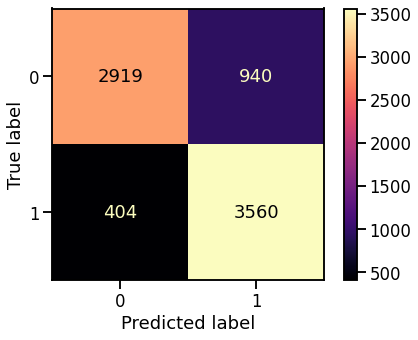

In [ ]:
plot_confusion_matrix(clf_xgb, X, y, cmap="magma");

# Conclusiones XGBoost Classifier

- Nos encontramos con un Dataset equilibrado  casi artificialmente. Los nulos se encontraban distribuidos casi sistematicamente en la posicion de los registros asi como en la cantidad porcentual de nulos por columna. 
- Teniendo en cuenta esto realizamos imputaciones tanto para datos categoricos como numericos, consiguiendo asi no elimanar datos que pudieran ser utiles. 
- Los datos asi tambien como las features generadas presentaban poca correlacion de tipo lineal.
- Al ser un problema de clasificacion binaria, la eleccion de XGBClasifier era una muy buena opcion. 
- Variamos la curacion de datos como primera instancia y con los parametros por defecto del modelo.
- Luego de encontrar la mejor version de limpieza de datos para este modelo(la que presenta esta notebook), procedimos a tocar los hiperparametros teniendo en cuenta las funcionalidades que describe la documentacion en la libreria y llegamos al resultado aca demostrado. 
- Consideramos que es un modelo muy interesante y que tiene mucho potencial para este tipo de clasificacion. 
- Tambien creemos no tener la experiencia ni el conocimiento sufienciente para retocar mas profundamente los hiperparametros del modelo, pero nos esforzamos en encontrar con las herramientas que teniamos, los mas performantes para este conjunto de datos.


Por favor, leer el archivo Readme_Supervizado.txt que se encuentra en el siguiente repositorio de git junto con las notebooks. Aqui se encuentra informacion importante para entender las diferentes curaciones de datos que se usan en las tres notebooks.  
https://github.com/eleanarinaudo/Diplo2022_Grupo-5.git